In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import xarray as xr
xr.set_options(display_style='html')
import intake
%matplotlib inline
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

In [3]:
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)
col

,unique
activity_id,15
institution_id,33
source_id,73
experiment_id,103
member_id,159
table_id,29
variable_id,369
grid_label,10
zstore,269570
dcpp_init_year,60


In [19]:
cat = col.search(variable_id='chl', table_id='Omon', source_id='GFDL-ESM4', experiment_id=['esm-hist','esm-piControl', 'ssp585'],
                 grid_label='gr')
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year
0,CMIP,NOAA-GFDL,GFDL-ESM4,esm-hist,r1i1p1f1,Omon,chl,gr,gs://cmip6/CMIP/NOAA-GFDL/GFDL-ESM4/esm-hist/r...,NaN
1,CMIP,NOAA-GFDL,GFDL-ESM4,esm-piControl,r1i1p1f1,Omon,chl,gr,gs://cmip6/CMIP/NOAA-GFDL/GFDL-ESM4/esm-piCont...,NaN
2,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp585,r1i1p1f1,Omon,chl,gr,gs://cmip6/ScenarioMIP/NOAA-GFDL/GFDL-ESM4/ssp...,NaN


In [20]:
dset_dict = cat.to_dataset_dict(zarr_kwargs={'consolidated': True})
list(dset_dict.keys())

Dataset(s):   0%|                                        | 0/3 [00:00<?, ?it/s]


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


Dataset(s): 100%|████████████████████████████████| 3/3 [00:01<00:00,  2.71it/s]


['CMIP.NOAA-GFDL.GFDL-ESM4.esm-hist.Omon.gr',
 'CMIP.NOAA-GFDL.GFDL-ESM4.esm-piControl.Omon.gr',
 'ScenarioMIP.NOAA-GFDL.GFDL-ESM4.ssp585.Omon.gr']

In [21]:
ESM4_hist = dset_dict['CMIP.NOAA-GFDL.GFDL-ESM4.esm-hist.Omon.gr']
ESM4_hist

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 180, lev: 35, lon: 360, member_id: 1, time: 1980)
Coordinates:
    lev_bnds   (lev, bnds) float64 dask.array<chunksize=(35, 2), meta=np.ndarray>
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(360, 2), meta=np.ndarray>
    time_bnds  (time, bnds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(180, 2), meta=np.ndarray>
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * member_id  (member_id) <U8 'r1i1p1f1'
Dimensions without coordinates: bnds
Data variables:
    chl        (member_id, time, lev, lat, lon) float32 dask.array<chunksize=(1, 12, 35, 180, 360), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7 CMIP-6.0 UGRID-1.0
    activity_id:             CMIP
    branch_method:           standard
    branch_time_in_child:    0.0
    branch_time_in_parent:   36500.0
    comment:                 <null ref>
    contact:                 gfdl.climate.model.info@noaa.gov
    creation_date:           2019-06-13T06:57:16Z
    data_specs_version:      01.00.27
    experiment:              all-forcing simulation of the recent past with a...
    experiment_id:           esm-hist
    external_variables:      areacello volcello
    forcing_index:           1
    frequency:               mon
    further_info_url:        https://furtherinfo.es-doc.org/CMIP6.NOAA-GFDL.G...
    grid:                    ocean data regridded from tripolar - nominal 0.5...
    grid_label:              gr
    history:                 File was processed by fremetar (GFDL analog of C...
    initialization_index:    1
    institution:             National Oceanic and Atmospheric Administration,...
    institution_id:          NOAA-GFDL
    license:                 CMIP6 model data produced by NOAA-GFDL is licens...
    mip_era:                 CMIP6
    nominal_resolution:      1x1 degree
    parent_activity_id:      CMIP
    parent_experiment_id:    esm-piControl
    parent_mip_era:          CMIP6
    parent_source_id:        GFDL-ESM4
    parent_time_units:       days since 0001-1-1
    parent_variant_label:    r1i1p1f1
    physics_index:           1
    product:                 model-output
    realization_index:       1
    realm:                   ocnBgchem
    references:              see further_info_url attribute
    source:                  GFDL-ESM4 (2018):\natmos: GFDL-AM4.1 (Cubed-sphe...
    source_id:               GFDL-ESM4
    source_type:             AOGCM AER CHEM BGC
    status:                  2020-02-04;created; by gcs.cmip6.ldeo@gmail.com
    sub_experiment:          none
    sub_experiment_id:       none
    table_id:                Omon
    title:                   NOAA GFDL GFDL-ESM4 model output prepared for CM...
    tracking_id:             hdl:21.14100/cfcbd9e1-145d-4b16-9154-b7648adc6fd...
    variable_id:             chl
    variant_info:            N/A
    variant_label:           r1i1p1f1
    intake_esm_varname:      chl
    intake_esm_dataset_key:  CMIP.NOAA-GFDL.GFDL-ESM4.esm-hist.Omon.gr

In [33]:
# select just the surface level
surf_chl = ESM4_hist['chl'].isel(lev=0)
surf_chl

,Array,Chunk
Bytes,513.22 MB,3.11 MB
Shape,"(1, 1980, 180, 360)","(1, 12, 180, 360)"
Count,496 Tasks,165 Chunks
Type,float32,numpy.ndarray


In [34]:
# maybe until we more situated with python, just work with the last 2 years of the historical data
surf_chl = surf_chl.isel(time=slice(1956,1980))
surf_chl

<xarray.DataArray 'chl' (member_id: 1, time: 24, lat: 180, lon: 360)>
dask.array<getitem, shape=(1, 24, 180, 360), dtype=float32, chunksize=(1, 12, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) object 2013-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
    lev        float64 2.5
  * member_id  (member_id) <U8 'r1i1p1f1'
Attributes:
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    interp_method:  conserve_order1
    long_name:      Mass Concentration of Total Phytoplankton expressed as Ch...
    original_name:  chl
    standard_name:  mass_concentration_of_phytoplankton_expressed_as_chloroph...
    units:          kg m-3

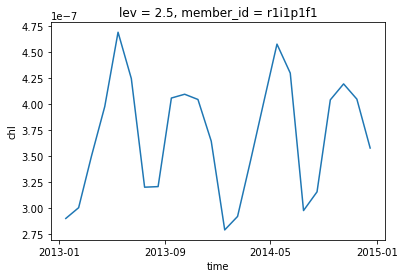

In [35]:
# time series
surf_chl.mean(dim=['lat','lon']).plot()

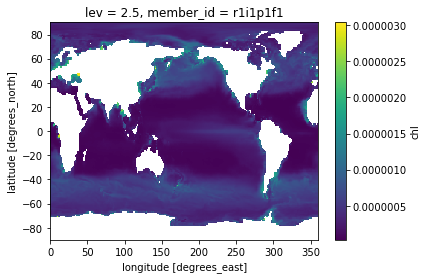

In [36]:
surf_chl.mean(dim=['time']).plot()